# Risk factor ranking heatmap

In [234]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Set font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

In [235]:
# Load the data
file_path = "//khu-server/KH_UNIV/임예솔/8. GBD_CRD(~Nat med_revision)/CRD_main_data/Figure 4_data_risk factor and DALYs.csv"
#file_path = "//khu-server/KH_UNIV/임예솔/8. GBD_CRD(~Nat med_revision)/CRD_main_data/Figure 4_data_big region.csv"
data = pd.read_csv(file_path)
data

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,rei_id,rei_name,metric_id,metric_name,year,val,upper,lower
0,2,DALYs (Disability-Adjusted Life Years),1,Global,1,Male,27,Age-standardized,509,Chronic obstructive pulmonary disease,87,Household air pollution from solid fuels,3,Rate,2021,204.248802,356.452075,121.749797
1,2,DALYs (Disability-Adjusted Life Years),1,Global,2,Female,27,Age-standardized,509,Chronic obstructive pulmonary disease,87,Household air pollution from solid fuels,3,Rate,2021,161.729800,261.767053,98.046749
2,2,DALYs (Disability-Adjusted Life Years),1,Global,3,Both,27,Age-standardized,509,Chronic obstructive pulmonary disease,87,Household air pollution from solid fuels,3,Rate,2021,181.169131,296.850592,111.061523
3,2,DALYs (Disability-Adjusted Life Years),1,Global,1,Male,27,Age-standardized,509,Chronic obstructive pulmonary disease,99,Smoking,3,Rate,2021,595.265280,703.873464,478.155582
4,2,DALYs (Disability-Adjusted Life Years),1,Global,2,Female,27,Age-standardized,509,Chronic obstructive pulmonary disease,99,Smoking,3,Rate,2021,106.202973,138.983919,77.922679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,2,DALYs (Disability-Adjusted Life Years),174,Eastern Sub-Saharan Africa,2,Female,27,Age-standardized,509,Chronic obstructive pulmonary disease,337,High temperature,3,Rate,2021,0.723122,2.612132,-0.309860
986,2,DALYs (Disability-Adjusted Life Years),174,Eastern Sub-Saharan Africa,3,Both,27,Age-standardized,509,Chronic obstructive pulmonary disease,337,High temperature,3,Rate,2021,1.261407,3.972486,-0.264637
987,2,DALYs (Disability-Adjusted Life Years),174,Eastern Sub-Saharan Africa,1,Male,27,Age-standardized,510,Pneumoconiosis,150,Occupational exposure to asbestos,3,Rate,2021,3.162214,7.726580,0.306903
988,2,DALYs (Disability-Adjusted Life Years),174,Eastern Sub-Saharan Africa,2,Female,27,Age-standardized,510,Pneumoconiosis,150,Occupational exposure to asbestos,3,Rate,2021,0.311248,1.511666,0.006019


In [ ]:
# Specify the cause_id you want to see directly
# cause_id : COPD = 509, Asthma = 515, Pneumoconiosis = 510
cause_of_interest = 509

# Filter only the corresponding cause_id among all data
data_filtered_cause = data[data['cause_id'] == cause_of_interest]

Ver.2

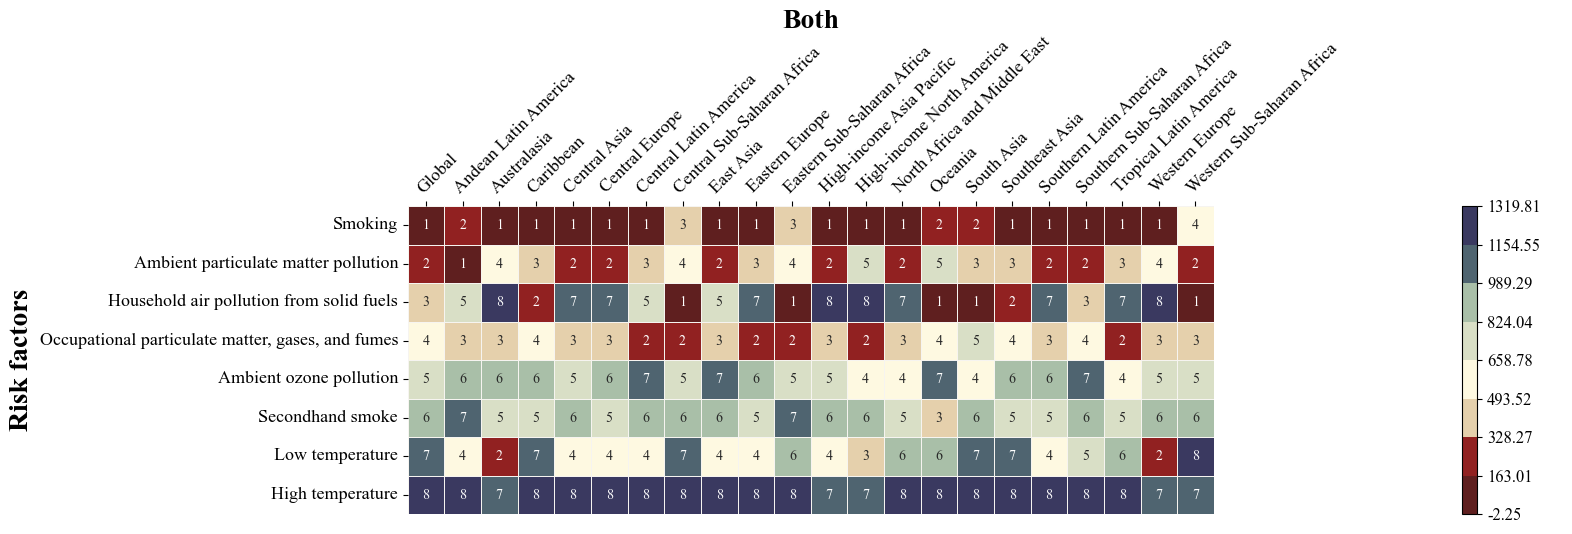

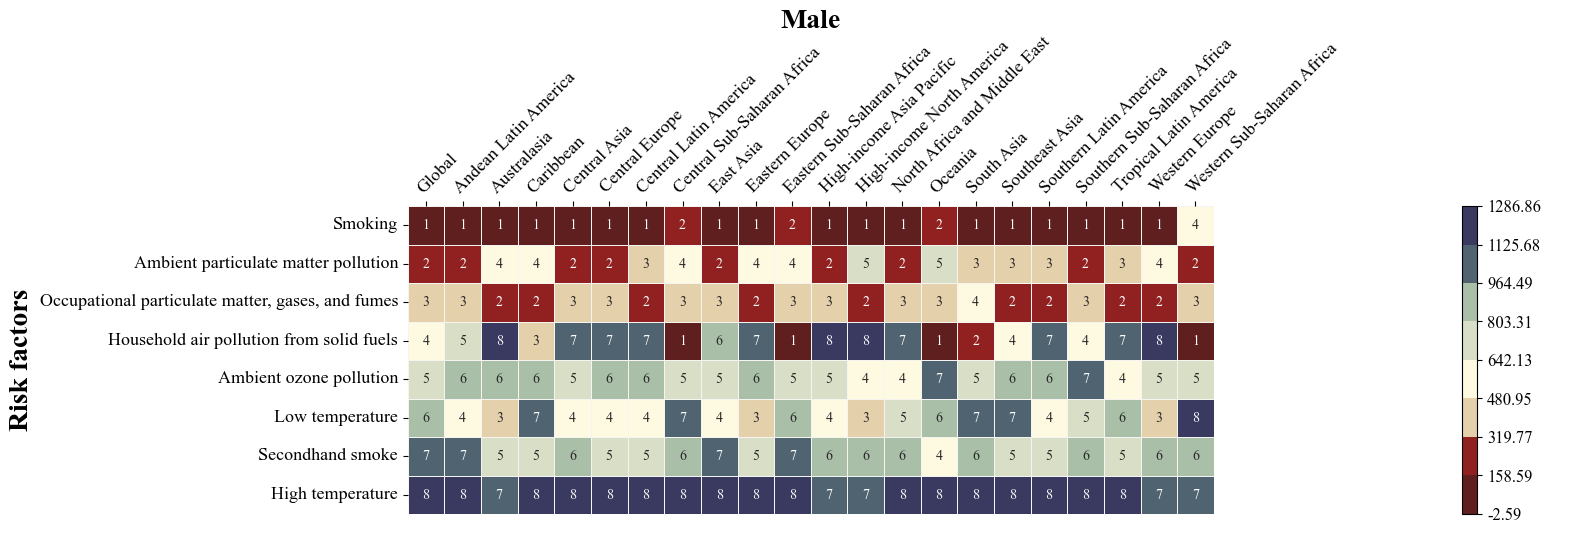

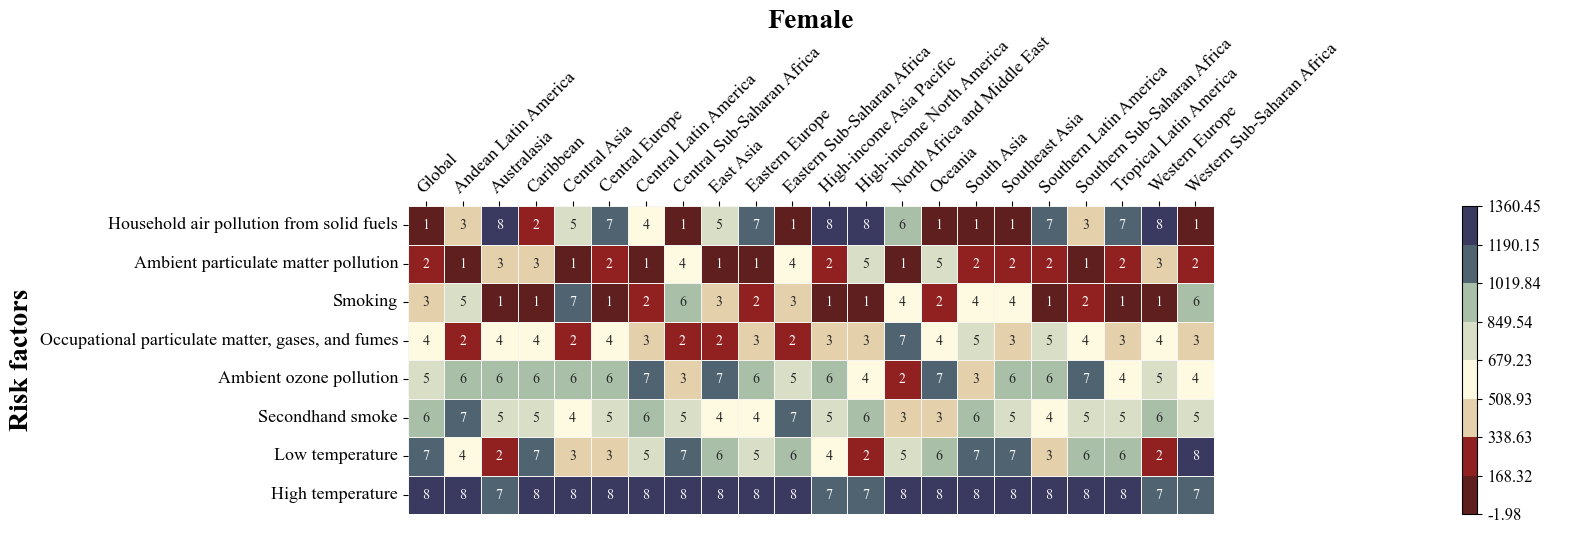

In [ ]:
# Create a custom color map (changeable to a list of desired colors)
custom_colors = ['#5F1F1F', '#912121', '#E5D0AC', '#FEF9E1', '#D9DFC6', '#A9BFA8', '#4F6470', '#3A3960'] # for COPD 
#custom_colors = ['#912121', '#E5D0AC', '#FEF9E1', '#D9DFC6', '#A9BFA8', '#4F6470', '#3A3960'] # for Asthma
#custom_colors = ['#912121', '#E5D0AC', '#FEF9E1', '#4F6470', '#3A3960'] # for Pneumoconiosis

cmap = mcolors.ListedColormap(custom_colors)  # 사용자 지정 컬러맵 생성

# Check heatmap data and color map mapping
for sex_name in ['Both', 'Male', 'Female']:
    # Filter data
    data_filtered = data_filtered_cause[data_filtered_cause['sex_name'] == sex_name]
    if data_filtered.empty:
        continue

    data_grouped = data_filtered.groupby(['rei_name', 'location_name'])['val'].mean().unstack()
    data_ranked = data_grouped.rank(ascending=False, method='min')

    # Move the 'Global' column to the front
    cols = list(data_grouped.columns)
    if 'Global' in cols:
        cols.remove('Global')
        cols = ['Global'] + cols
        data_grouped = data_grouped[cols]
        data_ranked = data_ranked[cols]

    # Sort rows by the 'Global' column
    if 'Global' in data_ranked.columns:
        data_ranked = data_ranked.sort_values(by='Global', ascending=True)
        data_grouped = data_grouped.loc[data_ranked.index]  # 동일 순서로 정렬

    # Set color map and range
    vmin = data_grouped.values.min()
    vmax = data_grouped.values.max()
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

    # Create heatmap (by rank)
    fig, ax = plt.subplots(figsize=(16,4))  # Plot size

    sns.heatmap(
        data_ranked,
        annot=True,
        fmt='.0f',
        cmap=cmap,  # Apply custom color map
        linewidths=0.5,
        linecolor='#F6F4F0', # line color
        cbar=False,
        ax=ax,
    )
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        rotation_mode='anchor',
        ha='left',
        fontsize=13
    )
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=13)

    # X, y-axis labels
    ax.set_xlabel(sex_name, fontsize=20, fontweight='bold')
    ax.set_ylabel('Risk factors', fontsize=20, fontweight='bold')

    # Add DALYs color bar on the right --> For checking the scale values
    ## (Add Legends directly later in the PPT)
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)  # matplotlib.cm.ScalarMappable
    sm.set_array(data_grouped.values)  # Connect actual data values
    cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.2)  # Increase intervals by adjusting the pad value

    # Set color bar scale  
    num_ticks = 9 # Display a total of n ticks.
    
    tick_values = np.linspace(vmin, vmax, num_ticks) # Divide the minimum and maximum values by num_ticks.
    tick_labels = [f"{tick:.2f}" for tick in tick_values] # Display up to two decimal places.
    cbar.set_ticks(tick_values)
    cbar.set_ticklabels(tick_labels)
    cbar.ax.tick_params(labelsize=12) # Adjust the tick size.
    cbar.set_label(' ', fontsize=13)

    # Save
    save_directory = "//khu-server/KH_UNIV/임예솔/8. GBD_CRD(~Nat med_revision)/"
    
    filename = f"{sex_name}_heatmap_COPD_final.png" # Check the name!!
    save_path = os.path.join(save_directory, filename)
    plt.savefig(save_path, dpi=300, bbox_inches='tight')  # Save in high definition.

    plt.show()